# **<span style="color:red">**Credit score classification**</span>**

## **1-Import Librairies**

In [395]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from joblib import dump, load

## **2-Import Dataset**

In [396]:
df=pd.read_excel("../Credit_Score_Classification/Input/CreditScore.xlsx")
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,7,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,_,4.0,Good,809.98,28.609352,22 Years and 1 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5,7,6.27,4.0,Good,809.98,31.377862,22 Years and 1 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6,7,11.27,4.0,Good,809.98,24.797347,22 Years and 1 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",8,7,9.27,4.0,Good,809.98,27.262259,22 Years and 1 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,Good,809.98,22.537593,22 Years and 1 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.0,Good,809.98,23.933795,22 Years and 1 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,4,7.42,2.0,Good,605.03,38.550848,26 Years and 7 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


## **3-Description of Dataset**

#### a.Shape

In [397]:
df.shape

(100000, 28)

#### b.Columns

In [398]:
df.columns.to_list()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

#### c.Columns description

In [399]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [400]:

col=pd.read_excel("../Credit_Score_Classification/Input/AboutColumns.xlsx")
col

,Column_Name,Description_English,Description_French
0,ID,Represents a unique identification of an entry,Représente une identification unique d’une entrée
1,Customer_ID,Represents a unique identification of a person,Représente une identification unique d’une personne
2,Month,Represents the month of the year,Représente le mois de l’année
3,Name,Represents the name of a person,Représente le nom d’une personne
4,Age,Represents the age of the person,Représente l’âge de la personne
5,SSN,Represents the social security number of a person,Représente le numéro de sécurité sociale d’une personne
6,Occupation,Represents the occupation of the person,Représente la profession de la personne
7,Annual_Income,Represents the annual income of the person,Représente le revenu annuel de la personne
8,Monthly_Inhand_Salary,Represents the monthly base salary of a person,Représente le salaire de base mensuel d’une personne
9,Num_Bank_Accounts,Represents the number of bank accounts a person holds,Représente le nombre de comptes bancaires qu’une personne détient


In [401]:
# Aligner les textes à gauche
styled_col = col.style.set_properties(**{'text-align': 'left'})
# Centrer les titres
styled_col = styled_col.set_table_styles(
    [{
        'selector': 'th',  # Sélecteur pour les titres
        'props': [('text-align', 'center')]  # Propriété pour centrer le texte
    }]
)
styled_col

,Column_Name,Description_English,Description_French
0,ID,Represents a unique identification of an entry,Représente une identification unique d’une entrée
1,Customer_ID,Represents a unique identification of a person,Représente une identification unique d’une personne
2,Month,Represents the month of the year,Représente le mois de l’année
3,Name,Represents the name of a person,Représente le nom d’une personne
4,Age,Represents the age of the person,Représente l’âge de la personne
5,SSN,Represents the social security number of a person,Représente le numéro de sécurité sociale d’une personne
6,Occupation,Represents the occupation of the person,Représente la profession de la personne
7,Annual_Income,Represents the annual income of the person,Représente le revenu annuel de la personne
8,Monthly_Inhand_Salary,Represents the monthly base salary of a person,Représente le salaire de base mensuel d’une personne
9,Num_Bank_Accounts,Represents the number of bank accounts a person holds,Représente le nombre de comptes bancaires qu’une personne détient


#### d.Data exploration

In [402]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,100000,10139,Langep,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,15,Lawyer,7096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18939,20867.67,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,100000.0,NaN,NaN,NaN,4199.880308,3188.480142,303.645417,1626.761667,3096.836667,5964.883333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,16.99195,116.893813,-1.0,3.0,6.0,7.0,1798.0


In [403]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Nb :  After displaying a few lines of the dataset with "Head" and its description, I noticed a lot of outliers and non-conforming types to be corrected. 

For example, on line 3 of the dataset, there's an age "-500" or on line 9, an age "28_". And at the top of the occupation column is "____". And the type of the "Annual_Income" column is "object" instead of integer or float.

## **4-Data cleaning and changing of some column types**

#### a.Age

In [405]:
df["Age"].unique().tolist()

['23',
 '-500',
 '28_',
 '28',
 '34',
 '54',
 '55',
 '21',
 '31',
 '33',
 '34_',
 '7580',
 '30',
 '30_',
 '24',
 '24_',
 '44',
 '45',
 '40',
 '41',
 '32',
 '33_',
 '35',
 '35_',
 '36',
 '39',
 '37',
 '181',
 '20',
 '46',
 '26',
 '42',
 '19',
 '31_',
 '48',
 '995',
 '40_',
 '37_',
 '38',
 '54_',
 '5079',
 '43',
 '21_',
 '22',
 '6409',
 '16',
 '7080',
 '18',
 '849',
 '3885',
 '20_',
 '15',
 '27',
 '43_',
 '38_',
 '25',
 '3052',
 '14',
 '5342',
 '17',
 '18_',
 '4431',
 '2657',
 '2111_',
 '46_',
 '47',
 '1032',
 '16_',
 '19_',
 '47_',
 '456',
 '5717',
 '53_',
 '53',
 '56',
 '25_',
 '27_',
 '55_',
 '3169',
 '1191',
 '29',
 '42_',
 '7140',
 '48_',
 '49',
 '49_',
 '8233',
 '6955',
 '2534',
 '3115',
 '7657',
 '51',
 '50',
 '5112',
 '50_',
 '32_',
 '6452',
 '2744',
 '22_',
 '17_',
 '1439',
 '29_',
 '5795',
 '4872',
 '1772',
 '15_',
 '1383',
 '5657',
 '52',
 '1934',
 '51_',
 '8352',
 '3734',
 '26_',
 '2056',
 '39_',
 '7508',
 '2339',
 '14_',
 '8406',
 '1424',
 '36_',
 '6953',
 '5626',
 '4471',
 

In [406]:
df["Age"] = df["Age"].str.replace("_","")
df["Age"]= df["Age"].astype(int)
df["Age"].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

In [407]:
# Change each Age by the median of each group of custumer_ID because of ---4808, 2263, min =-500, 1342---
df["Age"] = df.groupby(["Customer_ID"])["Age"].transform(lambda x: x.median()).round(0)

In [408]:
df["Age"]= df["Age"].astype(int)

In [409]:
# For checking
df["Age"].unique()

array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 32,
       41, 48, 43, 22, 36, 16, 18, 42, 19, 27, 38, 14, 25, 45, 47, 17, 53,
       24, 54, 29, 15, 49, 51, 50, 52, 56])

In [410]:
#For checking
df["Age"].describe()

count    100000.000000
mean         33.314000
std          10.765972
min          14.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          56.000000
Name: Age, dtype: float64

#### b.Annual Income

In [411]:
df["Annual_Income"].unique().tolist()

['19114.12',
 '34847.84',
 '34847.84_',
 '143162.64',
 '30689.89',
 '30689.89_',
 '35547.71_',
 '35547.71',
 '73928.46',
 '131313.4',
 '10909427.0',
 '34081.38_',
 '34081.38',
 '114838.41',
 '114838.41_',
 '31370.8',
 '33751.27',
 '88640.24',
 '88640.24_',
 '54392.16',
 '54392.16_',
 '8701.545',
 '8701.545_',
 '25546.26',
 '25546.26_',
 '31993.78',
 '92047.08',
 '92047.08_',
 '32284.62',
 '97791.42',
 '97791.42_',
 '19300.34',
 '19514.88',
 '10183.015',
 '10183.015_',
 '106733.13',
 '106733.13_',
 '12600.445',
 '12600.445_',
 '57983.12',
 '57983.12_',
 '20787.69',
 '34290.12',
 '34290.12_',
 '43070.24',
 '43070.24_',
 '28572.39',
 '6515990.0_',
 '39641.54',
 '39641.54_',
 '20186.02',
 '586359.0',
 '18627.64',
 '12986.745',
 '58317.0',
 '42171.98',
 '71681.4',
 '29469.98',
 '29469.98_',
 '72559.36',
 '15566.02',
 '15566.02_',
 '66567.32',
 '12909.895',
 '30788.44',
 '20574.47',
 '20574.47_',
 '148699.32',
 '148699.32_',
 '85554.03',
 '55829.79',
 '18334118.0',
 '19717385.0',
 '14165.23'

In [412]:
df["Annual_Income"] = df["Annual_Income"].str.replace("_","")
df["Annual_Income"] = df["Annual_Income"].astype(float)

In [413]:
df["Annual_Income"] = df.groupby(["Customer_ID"])["Annual_Income"].transform(lambda x: x.median())

In [414]:
df["Annual_Income"].describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

#### c.Number bank accounts

In [415]:
df["Num_Bank_Accounts"].describe()

count    100000.000000
mean         16.991950
std         116.893813
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [416]:
#Because of the "describe" function on this column, with a maximum number of bank account at 1798, something is wrong. So I recalculate the column
df["Num_Bank_Accounts"] = df.groupby(["Customer_ID"])["Num_Bank_Accounts"].transform(lambda x: x.median()).round(0)

#### d.Other preprocessing

##### d.1.Number of credit card

In [417]:
df["Num_Credit_Card"].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [418]:
df["Num_Credit_Card"] = df.groupby(["Customer_ID"])["Num_Credit_Card"].transform(lambda x: x.median())

In [419]:
df["Num_Credit_Card"].describe()

count    100000.000000
mean          5.534640
std           2.066834
min           0.500000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

##### d.2.Interest rate

In [420]:
df["Interest_Rate"].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [421]:
df["Interest_Rate"] = df.groupby(["Customer_ID"])["Interest_Rate"].transform(lambda x: x.median())

In [422]:
df["Interest_Rate"].describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

##### d.3.Number of Loan

In [423]:
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_","")
df["Num_of_Loan"] = df["Num_of_Loan"].astype(int)
df["Num_of_Loan"].describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

In [424]:
# Because of the "describe" function on this column, with a minimum value at -100 number of loan, something is wrong. So I recalculate the column
df["Num_of_Loan"] = df.groupby(["Customer_ID"])["Num_of_Loan"].transform(lambda x: x.median()).round(0)

In [425]:
# For checking
df["Num_of_Loan"].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

##### d.4.Number of delayed payment

In [426]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_","")
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype(float)

##### d.5.Percent of changed Credit Limit

In [427]:
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].str.replace("_","0")
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype(float)
df["Changed_Credit_Limit"].describe()

count    100000.000000
mean         10.171791
std           6.880628
min          -6.490000
25%           4.970000
50%           9.250000
75%          14.660000
max          36.970000
Name: Changed_Credit_Limit, dtype: float64

##### d.6.Outstanding debt

In [428]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_","")
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype(float)
df["Outstanding_Debt"].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

##### d.7.Payment of minimum amount

In [429]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].str.replace("NM","No")
df["Payment_of_Min_Amount"].unique()

array(['No', 'Yes'], dtype=object)

##### d.8.Amount invested monthly

In [430]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(float)
df["Amount_invested_monthly"].describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

##### d.9.Monthly balance

In [431]:
df["Monthly_Balance"] = df["Monthly_Balance"].astype(float).round(2)

In [432]:
df["Monthly_Balance"].describe()

count    98791.000000
mean       402.551261
std        213.925513
min          0.010000
25%        270.110000
50%        336.730000
75%        470.265000
max       1602.040000
Name: Monthly_Balance, dtype: float64

##### d.10.Occupation

In [433]:
df["Occupation"].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

##### d.11.Credit_Mix

In [434]:
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

##### d.12.Paiement of minimum amount

In [435]:
df["Payment_of_Min_Amount"].unique()

array(['No', 'Yes'], dtype=object)

##### d.13.Info function after preprocessing

In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int32  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

## **5-Handle missing Values**

#### a.Identifying missing values

In [437]:
df.isna().sum() / len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         0.000
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      8.784
Payment_Behaviour            0.000
Monthly_Balance              1.209
Credit_Score                 0.000
dtype: float64

In [438]:
# Resume columns with missing values
columns_na= df[["Type_of_Loan", "Amount_invested_monthly", "Monthly_Balance" ]]
columns_na.isna().sum().reset_index()

,index,0
0,Type_of_Loan,11408
1,Amount_invested_monthly,8784
2,Monthly_Balance,1209


#### b.Replacing missing values

##### b.1.Amount invested monthly

In [439]:
df["Amount_invested_monthly"].describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

In [440]:
df["Amount_invested_monthly"] = df.groupby('Customer_ID')["Amount_invested_monthly"].transform(lambda x: x.fillna(x.median()))

##### b.2.Monthly balance

In [441]:
df["Monthly_Balance"].unique()

array([312.49, 284.63, 331.21, ..., 189.64, 410.26, 479.87])

In [442]:
df["Monthly_Balance"] = df.groupby('Customer_ID')["Monthly_Balance"].transform(lambda x: x.fillna(x.median()))

##### b.3.Checking

In [443]:
columns_na= df[["Type_of_Loan", "Amount_invested_monthly", "Monthly_Balance" ]]
columns_na.isna().sum().reset_index()

,index,0
0,Type_of_Loan,11408
1,Amount_invested_monthly,0
2,Monthly_Balance,0


Nb: I won't use the "type of loan" column, so I won't fill the missing values

#### c.Extraction of the clean dataset

In [444]:
df.to_csv('output\df_cleaned.csv', index=False)

## **6-Selecting features**

    Import of the cleaned dataset

In [445]:
df1 =pd.read_csv("../Credit_Score_Classification/Output/df_cleaned.csv")
df1.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7.0,11.27,4.0,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.49,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,7.0,11.27,4.0,Good,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.63,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7.0,0.00,4.0,Good,809.98,28.609352,22 Years and 1 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.21,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5,7.0,6.27,4.0,Good,809.98,31.377862,22 Years and 1 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.45,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6,7.0,11.27,4.0,Good,809.98,24.797347,22 Years and 1 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.49,Good


#### a.Encoding of categorical variables before correlation matrix

##### a.1.Label Encoding for "Occupation"

In [446]:
df1["Occupation"].value_counts().sort_values()

Occupation
Writer           6304
Musician         6352
Manager          6432
Journalist       6536
Doctor           6568
Entrepreneur     6648
Teacher          6672
Developer        6720
Media_Manager    6720
Scientist        6744
Accountant       6744
Mechanic         6776
Architect        6824
Engineer         6864
Lawyer           7096
Name: count, dtype: int64

In [447]:
occupation = LabelEncoder()
df1['Occup_encoded'] = occupation.fit_transform(df1['Occupation'])
df1['Occup_encoded'].value_counts().sort_values()

Occup_encoded
14    6304
11    6352
8     6432
6     6536
3     6568
5     6648
13    6672
2     6720
10    6720
12    6744
0     6744
9     6776
1     6824
4     6864
7     7096
Name: count, dtype: int64

##### a.2.Ordinal Encoding for "Credit Mix"

In [448]:
df1["Credit_Mix"].value_counts().sort_values()

Credit_Mix
Bad         23768
Good        30384
Standard    45848
Name: count, dtype: int64

In [449]:
order = {'Bad': 0, 'Standard': 1, 'Good': 2}
df1["CredMix_encoded"] = df1["Credit_Mix"].map(order)
df1["CredMix_encoded"].value_counts().sort_values()

CredMix_encoded
0    23768
2    30384
1    45848
Name: count, dtype: int64

##### a.3.Label Encoding for "Paiement of minimum amount"

In [450]:
df1["Payment_of_Min_Amount"].value_counts().sort_values()

Payment_of_Min_Amount
No     47674
Yes    52326
Name: count, dtype: int64

In [451]:
payment = LabelEncoder()
df1['Payment_encoded'] = payment.fit_transform(df1["Payment_of_Min_Amount"])
df1['Payment_encoded'].value_counts().sort_values()

Payment_encoded
0    47674
1    52326
Name: count, dtype: int64

##### a.4.Ordinal Encoding for "Credit score"

In [452]:
df1["Credit_Score"].value_counts().sort_values()

Credit_Score
Good        17828
Poor        28998
Standard    53174
Name: count, dtype: int64

In [453]:
scoring = {'Poor': 0, 'Standard': 1, 'Good': 2}
df1["Scoring_encoded"] = df1["Credit_Score"].map(scoring)
df1["Scoring_encoded"] .value_counts().sort_values()

Scoring_encoded
2    17828
0    28998
1    53174
Name: count, dtype: int64

#### b.Correlation matrix

In [454]:
# Columns infomations 
df1.columns.tolist()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score',
 'Occup_encoded',
 'CredMix_encoded',
 'Payment_encoded',
 'Scoring_encoded']

In [455]:
# Columns types
df1.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

##### b.1.Selection of numerical variables for correlation matrix

In [456]:
df2 = df1.select_dtypes(include=['int64', 'float64', 'int32'])
df2

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occup_encoded,CredMix_encoded,Payment_encoded,Scoring_encoded
0,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.49,12,2,0,2
1,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,7.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.63,12,2,0,2
2,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,0.00,4.0,809.98,28.609352,49.574949,81.699521,331.21,12,2,0,2
3,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,7.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.45,12,2,0,2
4,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,7.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.49,12,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,23,6.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.87,9,2,0,0
99996,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,18,6.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.65,9,2,0,0
99997,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.81,9,2,0,0
99998,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,20,6.0,11.50,3.0,502.38,33.638208,35.104023,251.672582,319.16,9,2,0,1


In [457]:
df2.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Occup_encoded', 'CredMix_encoded', 'Payment_encoded',
       'Scoring_encoded'],
      dtype='object')

In [458]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.314000,10.765972,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4199.880308,3188.480142,303.645417,1626.761667,3096.836667,5964.883333,15204.633333
Num_Bank_Accounts,100000.0,5.369200,2.593438,-1.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100000.0,5.534640,2.066834,0.500000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,30.747920,226.173639,-3.000000,9.000000,14.000000,18.000000,4388.000000
Changed_Credit_Limit,100000.0,10.171791,6.880628,-6.490000,4.970000,9.250000,14.660000,36.970000


##### b.2.Correlation matrix

In [459]:
corr_df2 = df2.corr(method="pearson").round(2)
corr_df2

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occup_encoded,CredMix_encoded,Payment_encoded,Scoring_encoded
Age,1.00,0.09,0.09,-0.19,-0.15,-0.22,-0.21,-0.17,0.00,-0.15,0.00,-0.20,0.03,0.00,0.06,0.12,-0.00,0.24,-0.23,0.16
Annual_Income,0.09,1.00,1.00,-0.28,-0.22,-0.30,-0.26,-0.25,-0.00,-0.17,-0.01,-0.27,0.18,0.01,0.63,0.71,0.00,0.34,-0.27,0.21
Monthly_Inhand_Salary,0.09,1.00,1.00,-0.28,-0.22,-0.30,-0.25,-0.25,-0.00,-0.17,-0.01,-0.27,0.18,0.01,0.63,0.71,0.00,0.34,-0.27,0.21
Num_Bank_Accounts,-0.19,-0.28,-0.28,1.00,0.44,0.58,0.47,0.56,0.01,0.32,0.01,0.51,-0.07,-0.01,-0.18,-0.30,0.01,-0.72,0.51,-0.39
Num_Credit_Card,-0.15,-0.22,-0.22,0.44,1.00,0.50,0.42,0.48,0.01,0.24,0.02,0.49,-0.06,-0.01,-0.14,-0.24,0.00,-0.54,0.36,-0.40
Interest_Rate,-0.22,-0.30,-0.30,0.58,0.50,1.00,0.56,0.59,0.00,0.35,0.00,0.63,-0.08,-0.01,-0.19,-0.33,0.00,-0.75,0.55,-0.49
Num_of_Loan,-0.21,-0.26,-0.25,0.47,0.42,0.56,1.00,0.50,0.01,0.36,0.01,0.64,-0.10,-0.00,-0.16,-0.43,-0.01,-0.64,0.45,-0.36
Delay_from_due_date,-0.17,-0.25,-0.25,0.56,0.48,0.59,0.50,1.00,0.01,0.28,-0.01,0.57,-0.06,-0.00,-0.16,-0.28,0.01,-0.69,0.44,-0.43
Num_of_Delayed_Payment,0.00,-0.00,-0.00,0.01,0.01,0.00,0.01,0.01,1.00,-0.00,0.01,0.01,0.00,0.00,-0.00,-0.01,0.02,-0.02,0.01,-0.01
Changed_Credit_Limit,-0.15,-0.17,-0.17,0.32,0.24,0.35,0.36,0.28,-0.00,1.00,0.00,0.44,-0.05,-0.00,-0.11,-0.20,-0.00,-0.41,0.42,-0.16


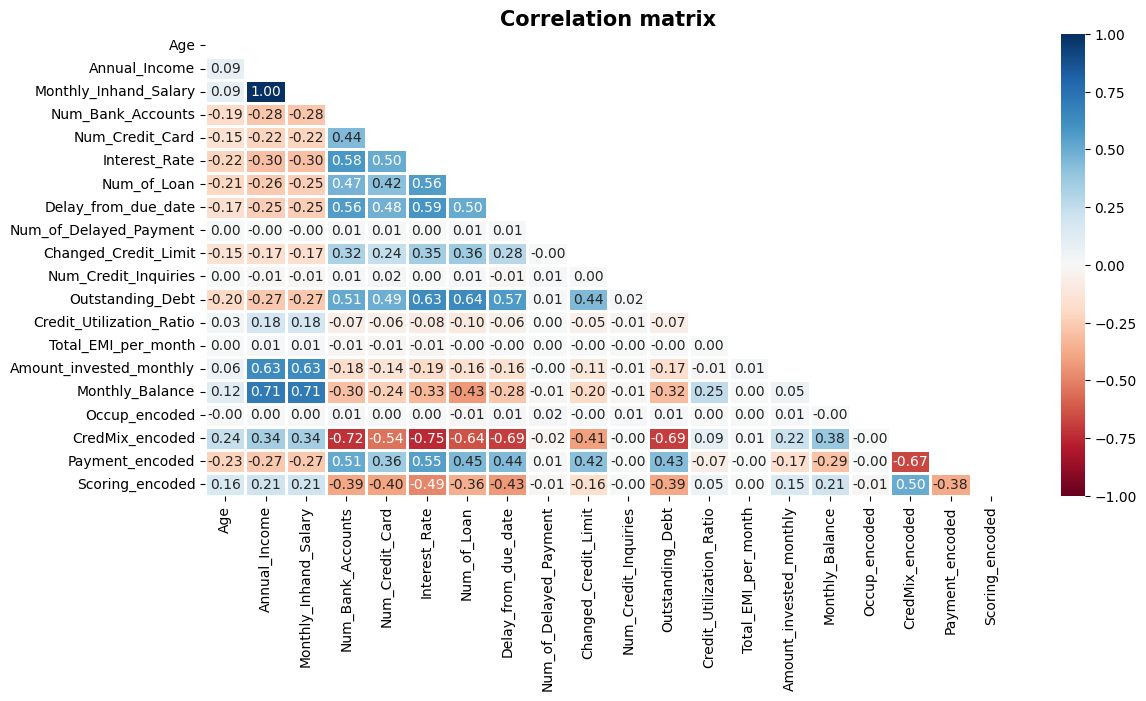

In [460]:
# correlation matrix visualization
plt.figure(figsize=(13,6))
mask = np.triu(np.ones_like(corr_df2, dtype=bool))
sns.heatmap(corr_df2, mask=mask, center=0, cmap='RdBu', 
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix', fontsize = 15, fontweight='bold')
plt.show()

In [461]:
# Extract features correlations with Scoring_encoded
corr_with_Scoring_encoded = corr_df2['Scoring_encoded'].drop('Scoring_encoded')
corr_with_Scoring_encoded

Age                         0.16
Annual_Income               0.21
Monthly_Inhand_Salary       0.21
Num_Bank_Accounts          -0.39
Num_Credit_Card            -0.40
Interest_Rate              -0.49
Num_of_Loan                -0.36
Delay_from_due_date        -0.43
Num_of_Delayed_Payment     -0.01
Changed_Credit_Limit       -0.16
Num_Credit_Inquiries       -0.00
Outstanding_Debt           -0.39
Credit_Utilization_Ratio    0.05
Total_EMI_per_month         0.00
Amount_invested_monthly     0.15
Monthly_Balance             0.21
Occup_encoded              -0.01
CredMix_encoded             0.50
Payment_encoded            -0.38
Name: Scoring_encoded, dtype: float64

In [462]:
# Top 8 features
top_features = corr_with_Scoring_encoded.abs().sort_values(ascending=False).head(8)
print("Top 8 features to predict Credit score")
print(top_features)

Top 8 features to predict Credit score
CredMix_encoded        0.50
Interest_Rate          0.49
Delay_from_due_date    0.43
Num_Credit_Card        0.40
Outstanding_Debt       0.39
Num_Bank_Accounts      0.39
Payment_encoded        0.38
Num_of_Loan            0.36
Name: Scoring_encoded, dtype: float64


Considering moderate (>|0.3|) and strong (>|0.5|) correlation thresholds with the scoring_encoded target variable, the features are:

1 = Interest_Rate (-0.49)

2 = CredMix_encoded (0.50)

3 = Delay_from_due_date (-0.43)

4 = Num_Bank_Accounts (-0.39)

5 = Outstanding_Debt (-0.39)

6 = Payment_encoded (-0.38)

7 = Num_Credit_Card (-0.40)

8 = Num_of_Loan (-0.36)

In conclusion, using the correlation matrix, I was able to identify the features with a significant relationship to the target variable. 

This allows me to simplify the model by eliminating less relevant features, which can improve model performance and interpretability.

Nb : To confirm my choice of features, I'll use the Recursive Feature Elimination (RFE) method.

#### c.Recursive Feature Elimination(RFE)

In [463]:
df2.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occup_encoded,CredMix_encoded,Payment_encoded,Scoring_encoded
0,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.49,12,2,0,2
1,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,7.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.63,12,2,0,2
2,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,0.00,4.0,809.98,28.609352,49.574949,81.699521,331.21,12,2,0,2
3,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,7.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.45,12,2,0,2
4,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,7.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.49,12,2,0,2


##### c.1.Define features and target variable

In [464]:
X = df2.drop(columns=['Scoring_encoded']) #Features
y = df2['Scoring_encoded'] #Target variable
X , y

(       Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0       23       19114.12            1824.843333                3.0   
 1       23       19114.12            1824.843333                3.0   
 2       23       19114.12            1824.843333                3.0   
 3       23       19114.12            1824.843333                3.0   
 4       23       19114.12            1824.843333                3.0   
 ...    ...            ...                    ...                ...   
 99995   25       39628.99            3359.415833                4.0   
 99996   25       39628.99            3359.415833                4.0   
 99997   25       39628.99            3359.415833                4.0   
 99998   25       39628.99            3359.415833                4.0   
 99999   25       39628.99            3359.415833                4.0   
 
        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
 0                  4.0            3.0          4.0       

In [465]:
X.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Occup_encoded', 'CredMix_encoded', 'Payment_encoded'],
      dtype='object')

In [466]:
X.dtypes

Age                           int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Occup_encoded                 int32
CredMix_encoded               int64
Payment_encoded               int32
dtype: object

In [467]:
# Features already encoded
feat_already_encoded = ['Payment_encoded', 'CredMix_encoded', 'Occup_encoded']

In [468]:
X[feat_already_encoded]

,Payment_encoded,CredMix_encoded,Occup_encoded
0,0,2,12
1,0,2,12
2,0,2,12
3,0,2,12
4,0,2,12
...,...,...,...
99995,0,2,9
99996,0,2,9
99997,0,2,9
99998,0,2,9


In [469]:
# Features to be standardized
feat_to_standadize = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card','Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                      'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance' ]

In [470]:
X[feat_to_standadize]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.49
1,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1,7.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.63
2,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,0.00,4.0,809.98,28.609352,49.574949,81.699521,331.21
3,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,7.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.45
4,23,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,7.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,23,6.0,11.50,3.0,502.38,34.663572,35.104023,60.971333,479.87
99996,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,18,6.0,11.50,3.0,502.38,40.565631,35.104023,54.185950,496.65
99997,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,27,6.0,11.50,3.0,502.38,41.255522,35.104023,24.028477,516.81
99998,25,39628.99,3359.415833,4.0,6.0,7.0,2.0,20,6.0,11.50,3.0,502.38,33.638208,35.104023,251.672582,319.16


In [471]:
# Create an instance of StandardScaler
scaler = StandardScaler()

In [472]:
# Standardization
X[feat_to_standadize] = scaler.fit_transform(X[feat_to_standadize])
X[feat_to_standadize]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.215932,-0.104999,0.159610,-0.112156,-0.533485,-1.067562,-0.162960,-0.581521,-0.424408
1,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.485110,-0.104999,0.159610,-0.112156,-0.533485,-0.066489,-0.162960,-0.387126,-0.554339
2,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.215932,-0.104999,-1.478330,-0.112156,-0.533485,-0.718376,-0.162960,-0.574928,-0.337104
3,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.081342,-0.104999,-0.567072,-0.112156,-0.533485,-0.177318,-0.162960,0.029631,-0.839664
4,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.014048,-0.104999,0.159610,-0.112156,-0.533485,-1.463366,-0.162960,-0.781717,-0.289161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.772252,-0.283978,-0.263595,-0.527951,0.225157,-0.861667,-0.626600,0.129961,-0.109421,0.193037,-0.117630,-0.799776,0.464817,-0.164702,-0.681344,0.356202
99996,-0.772252,-0.283978,-0.263595,-0.527951,0.225157,-0.861667,-0.626600,-0.206512,-0.109421,0.193037,-0.117630,-0.799776,1.618273,-0.164702,-0.716179,0.434459
99997,-0.772252,-0.283978,-0.263595,-0.527951,0.225157,-0.861667,-0.626600,0.399139,-0.109421,0.193037,-0.117630,-0.799776,1.753100,-0.164702,-0.871004,0.528479
99998,-0.772252,-0.283978,-0.263595,-0.527951,0.225157,-0.861667,-0.626600,-0.071923,-0.109421,0.193037,-0.117630,-0.799776,0.264427,-0.164702,0.297695,-0.393301


In [473]:
# Concateination of all columns
X_all = pd.concat([X[feat_to_standadize], X[feat_already_encoded]], axis=1)
X_all

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Payment_encoded,CredMix_encoded,Occup_encoded
0,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.215932,-0.104999,0.159610,-0.112156,-0.533485,-1.067562,-0.162960,-0.581521,-0.424408,0,2,12
1,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.485110,-0.104999,0.159610,-0.112156,-0.533485,-0.066489,-0.162960,-0.387126,-0.554339,0,2,12
2,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.215932,-0.104999,-1.478330,-0.112156,-0.533485,-0.718376,-0.162960,-0.574928,-0.337104,0,2,12
3,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.081342,-0.104999,-0.567072,-0.112156,-0.533485,-0.177318,-0.162960,0.029631,-0.839664,0,2,12
4,-0.958023,-0.819625,-0.744884,-0.913541,-0.742511,-1.319266,0.190946,-1.014048,-0.104999,0.159610,-0.112156,-0.533485,-1.463366,-0.162960,-0.781717,-0.289161,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.772252,-0.283978,-0.263595,-0.527951,0.225157,-0.861667,-0.626600,0.129961,-0.109421,0.193037,-0.117630,-0.799776,0.464817,-0.164702,-0.681344,0.356202,0,2,9
99996,-0.772252,-0.283978,-0.263595,-0.527951,0.225157,-0.861667,-0.626600,-0.206512,-0.109421,0.193037,-0.117630,-0.799776,1.618273,-0.164702,-0.716179,0.434459,0,2,9
99997,-0.772252,-0.283978,-0.263595,-0.527951,0.225157,-0.861667,-0.626600,0.399139,-0.109421,0.193037,-0.117630,-0.799776,1.753100,-0.164702,-0.871004,0.528479,0,2,9
99998,-0.772252,-0.283978,-0.263595,-0.527951,0.225157,-0.861667,-0.626600,-0.071923,-0.109421,0.193037,-0.117630,-0.799776,0.264427,-0.164702,0.297695,-0.393301,0,2,9


##### c.2.Split data into training and test sets

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

In [475]:
X_train.shape

(80000, 19)

In [476]:
X_test.shape 

(20000, 19)

In [477]:
y_train.shape 

(80000,)

In [478]:
y_test.shape

(20000,)

##### c.3.Instantiating the RandomForestClassifier model

In [479]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

##### c.4.Instantiate RFE with the model

In [480]:
rfe = RFE(estimator=model, n_features_to_select=8)

##### c.5.Adapt RFE to data

In [481]:
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=8)

##### c.6.Selected features

In [482]:
selected_features = X_all.columns[rfe.support_]
selected_features.tolist()

['Monthly_Inhand_Salary',
 'Interest_Rate',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'CredMix_encoded']

Based on the recursive feature elimination, the 8 selected are :

1 = Monthly_Inhand_Salary

2 = Interest_Rate

3 = Delay_from_due_date

4 = Changed_Credit_Limit

5 = Outstanding_Debt

6 = Amount_invested_monthly

7 = Monthly_Balance

8 = CredMix_encoded

Nb : The comparison between the features of the RFE method and those initially chosen with the correlation matrix, do not all match. 

Only 4 are similar. So I'm going to use Dataiku's feature importance to finalize the choice.

#### d.Dataiku's feature importance and feature effects

##### d.1.Feature importance

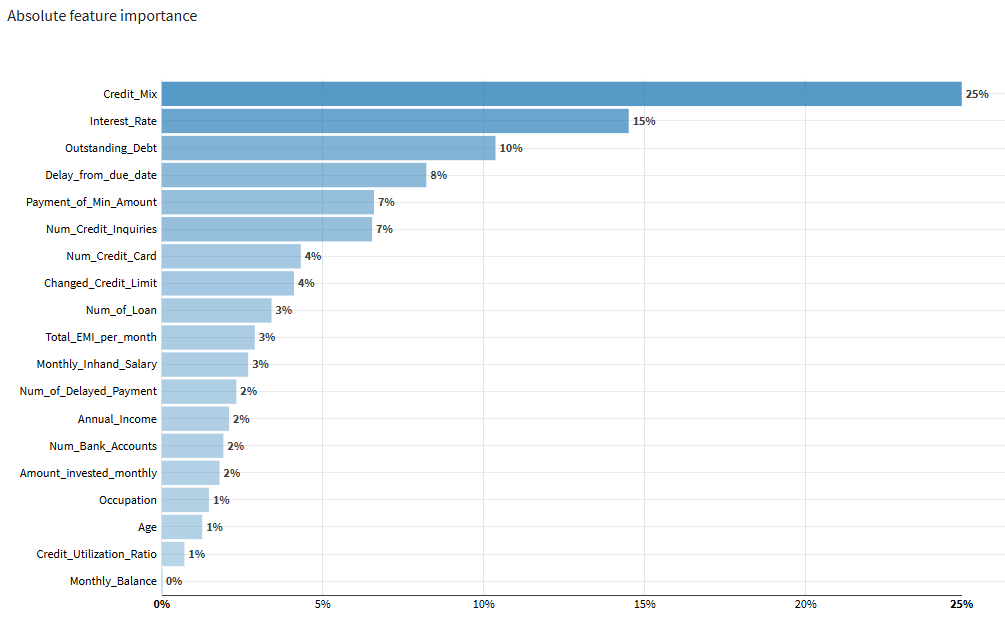

##### d.2.Feature effects

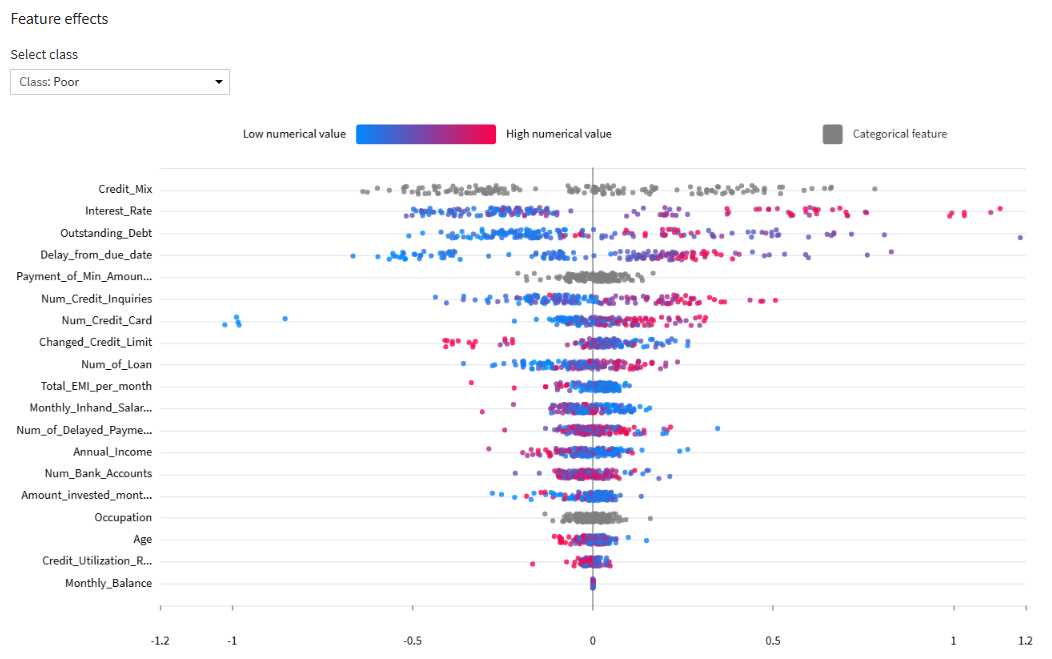

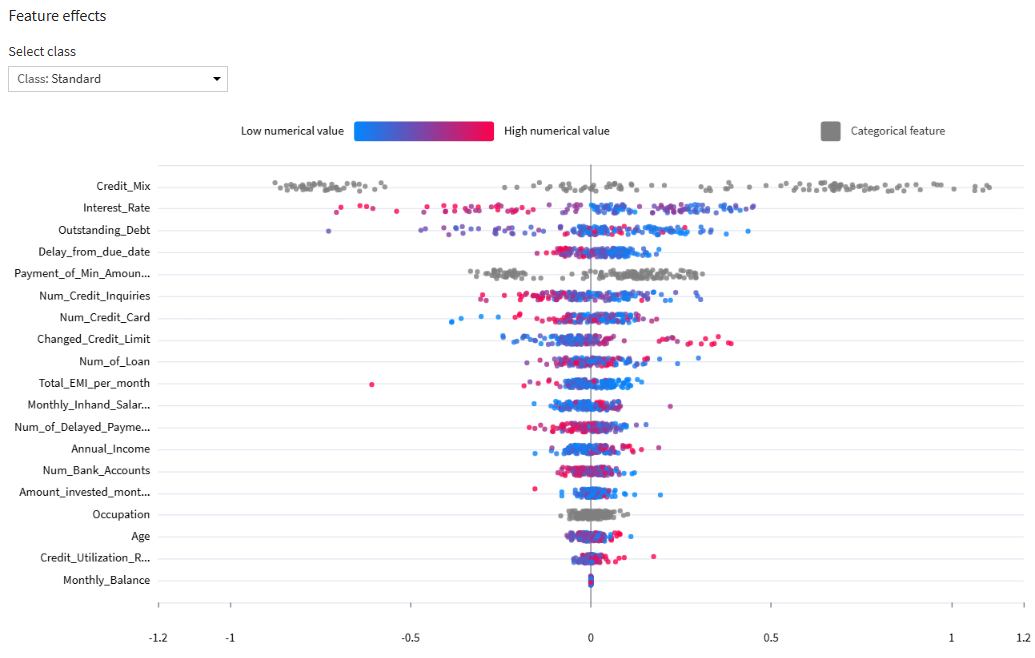

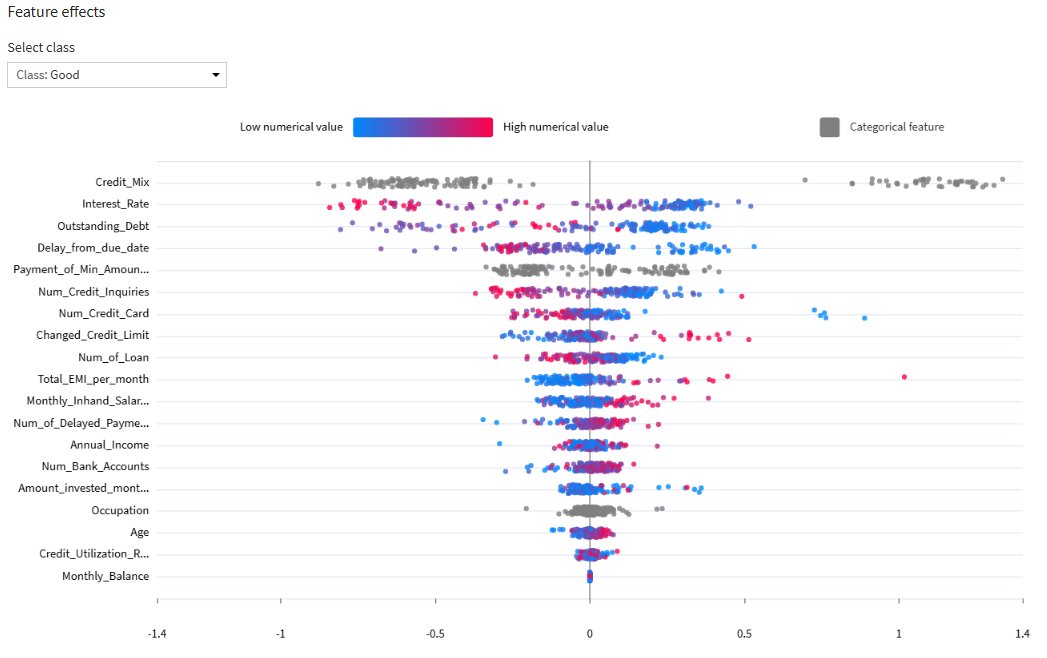

Based on the dataiku's feature importance, the first 8 selected are :

1 = Credit_Mix

2 = Interest_Rate

3 = Outstanding_Debt

4 = Delay_from_due_date

5 = Payment_of_Minimum_Amount

6 = Num_Credit_Inquiries

7 = Num_Credit_Card

8 = Changed_Credit_Limit

Nb : Considering the 3 feature selection methods, only 7 features are common. Therefore, for our credit scoring prediction, we will use 7 relevant features : 

1 = Credit_Mix

2 = Interest_Rate

3 = Outstanding_Debt

4 = Delay_from_due_date

5 = Payment_of_Minimum_Amount

6 = Num_Credit_Card

7 = Changed_Credit_Limit


## **7.Visualization on selected features**

In [483]:
dfv = df1[[
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Credit_Score']]
dfv.head()

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4.0,3.0,3,11.27,809.98,Good,No,Good
1,4.0,3.0,-1,11.27,809.98,Good,No,Good
2,4.0,3.0,3,0.00,809.98,Good,No,Good
3,4.0,3.0,5,6.27,809.98,Good,No,Good
4,4.0,3.0,6,11.27,809.98,Good,No,Good


In [484]:
dfv.to_csv('output\dfdataiku.csv', index=False)

#### a.Features distribution by target

##### a.1.Distribution of Credit Mix

C:\Users\CHAFFA Michèle\AppData\Local\Temp\ipykernel_10808\1745054163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv['Credit_Score'] = pd.Categorical(dfv['Credit_Score'], categories=['Good', 'Standard', 'Poor'], ordered=True)
C:\Users\CHAFFA Michèle\AppData\Local\Temp\ipykernel_10808\1745054163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv['Credit_Mix'] = pd.Categorical(dfv['Credit_Mix'], categories=['Good', 'Standard', 'Bad'], ordered=True)
C:\Users\CHAFFA Michèle\AppData\Local\Temp\ipyk

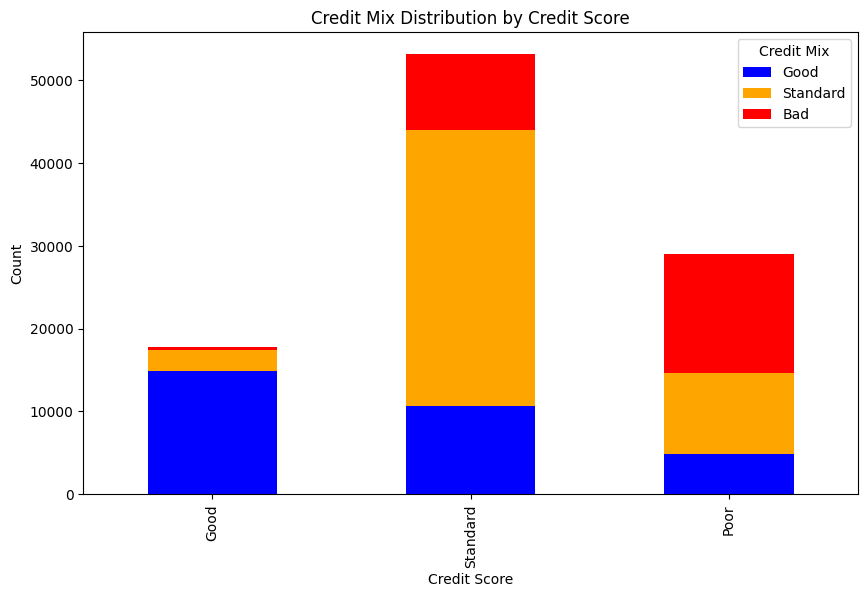

In [485]:
# Define specific order for Credit_Score et Credit_Mix
dfv['Credit_Score'] = pd.Categorical(dfv['Credit_Score'], categories=['Good', 'Standard', 'Poor'], ordered=True)
dfv['Credit_Mix'] = pd.Categorical(dfv['Credit_Mix'], categories=['Good', 'Standard', 'Bad'], ordered=True)

# Data preparation for the stacked bar plot
credit_mix_counts = dfv.groupby(['Credit_Score', 'Credit_Mix']).size().unstack(fill_value=0)

# Creation of stacked bar plot
credit_mix_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange', 'red'])

plt.title('Credit Mix Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Credit Mix')
plt.show()

##### a.2.Interest Rate Distribution by Credit Score

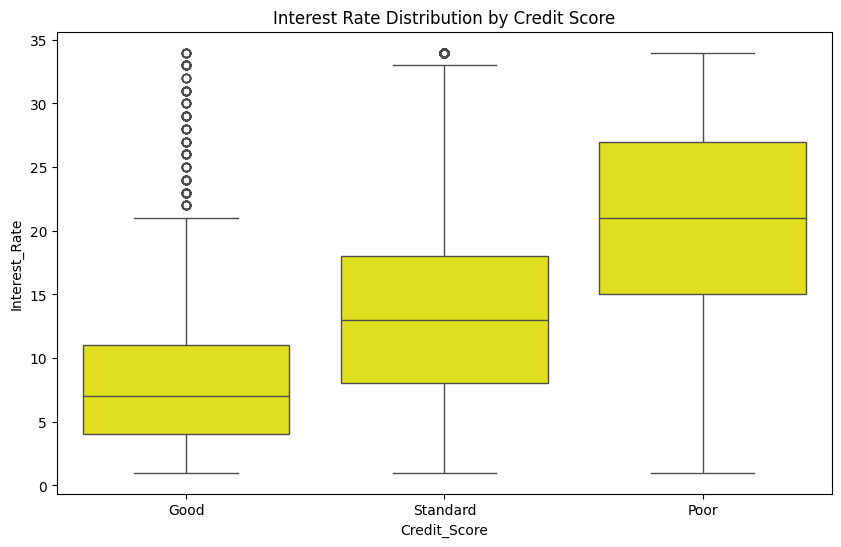

In [486]:
# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv, x='Credit_Score', y='Interest_Rate', color= 'yellow')
plt.title('Interest Rate Distribution by Credit Score')
plt.show()

In [487]:
# Remove outliers
dfv_filt = dfv[
    ((dfv['Credit_Score'] == 'Good') & (dfv['Interest_Rate'] <= 19)) |
    ((dfv['Credit_Score'] == 'Standard') & (dfv['Interest_Rate'] <= 33)) |
    (dfv['Credit_Score'] == 'Poor')
]

# Show the first filtered dataframe
dfv_filt

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4.0,3.0,3,11.27,809.98,Good,No,Good
1,4.0,3.0,-1,11.27,809.98,Good,No,Good
2,4.0,3.0,3,0.00,809.98,Good,No,Good
3,4.0,3.0,5,6.27,809.98,Good,No,Good
4,4.0,3.0,6,11.27,809.98,Good,No,Good
...,...,...,...,...,...,...,...,...
99995,6.0,7.0,23,11.50,502.38,Good,No,Poor
99996,6.0,7.0,18,11.50,502.38,Good,No,Poor
99997,6.0,7.0,27,11.50,502.38,Good,No,Poor
99998,6.0,7.0,20,11.50,502.38,Good,No,Standard


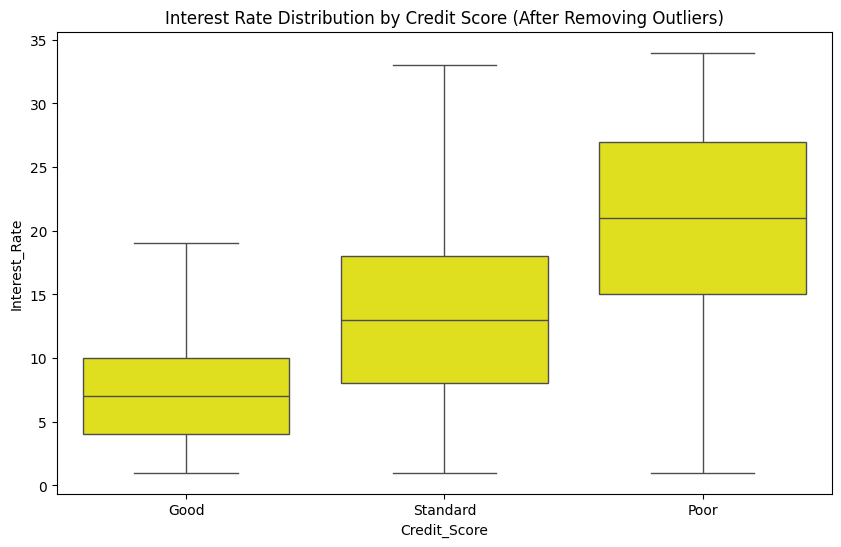

In [488]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv_filt, x='Credit_Score', y='Interest_Rate', color='yellow')
plt.title('Interest Rate Distribution by Credit Score (After Removing Outliers)')
plt.show()


##### a.3.Outstanding Debt Distribution by Credit Score

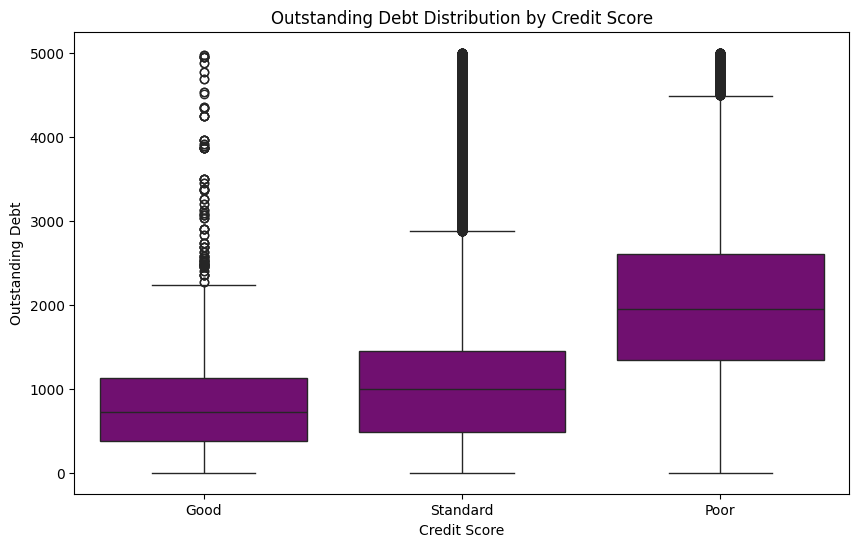

In [489]:
# Boxplot with the first filtered dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv_filt, x='Credit_Score', y='Outstanding_Debt', color ="purple")
plt.title('Outstanding Debt Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()

In [490]:
# Remove outliers
dfv_filt2 = dfv_filt[
    ((dfv_filt['Credit_Score'] == 'Good') & (dfv_filt['Outstanding_Debt'] <= 2200)) |
    ((dfv_filt['Credit_Score'] == 'Standard') & (dfv_filt['Outstanding_Debt'] <= 2500)) |
    ((dfv_filt['Credit_Score'] == 'Poor') & (dfv_filt['Outstanding_Debt'] <= 4250))
]

# Show the second filtered dataframe
dfv_filt2

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4.0,3.0,3,11.27,809.98,Good,No,Good
1,4.0,3.0,-1,11.27,809.98,Good,No,Good
2,4.0,3.0,3,0.00,809.98,Good,No,Good
3,4.0,3.0,5,6.27,809.98,Good,No,Good
4,4.0,3.0,6,11.27,809.98,Good,No,Good
...,...,...,...,...,...,...,...,...
99995,6.0,7.0,23,11.50,502.38,Good,No,Poor
99996,6.0,7.0,18,11.50,502.38,Good,No,Poor
99997,6.0,7.0,27,11.50,502.38,Good,No,Poor
99998,6.0,7.0,20,11.50,502.38,Good,No,Standard


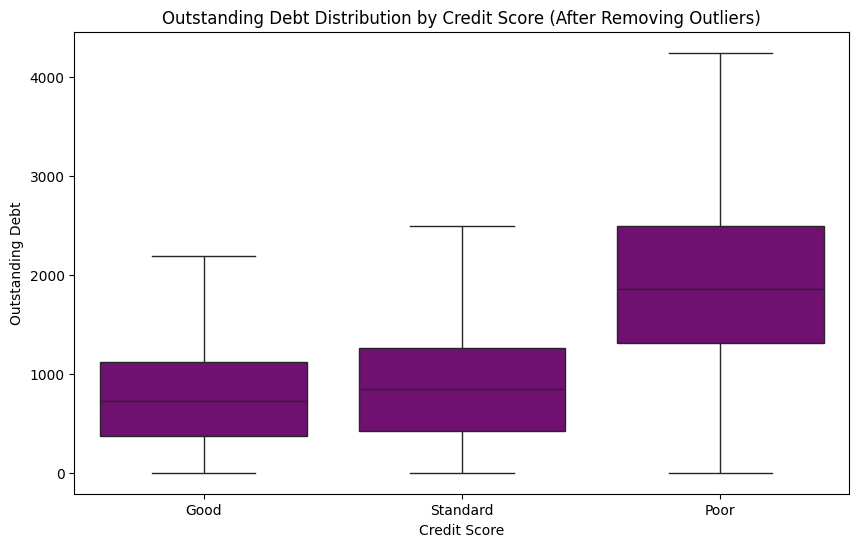

In [491]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv_filt2, x='Credit_Score', y='Outstanding_Debt', color ="purple")
plt.title('Outstanding Debt Distribution by Credit Score (After Removing Outliers)')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding Debt')
plt.show()

##### a.4.Delay from Due Date Distribution by Credit Score

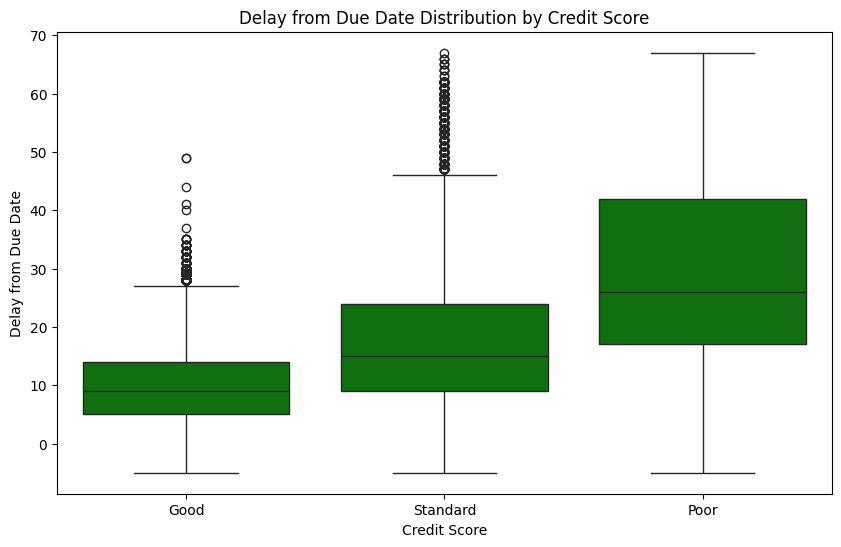

In [492]:
# Boxplot with the second filtered dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv_filt2, x='Credit_Score', y='Delay_from_due_date', color ='g')

plt.title('Delay from Due Date Distribution by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Delay from Due Date')
plt.show()

In [493]:
# Remove outliers
dfv_filt3 = dfv_filt2[
    ((dfv_filt2['Credit_Score'] == 'Good') & (dfv_filt2['Delay_from_due_date'] <= 27)) |
    ((dfv_filt2['Credit_Score'] == 'Standard') & (dfv_filt2['Delay_from_due_date'] <= 44)) |
    (dfv_filt2['Credit_Score'] == 'Poor')
]

# Show the third filtered dataframe
dfv_filt3

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4.0,3.0,3,11.27,809.98,Good,No,Good
1,4.0,3.0,-1,11.27,809.98,Good,No,Good
2,4.0,3.0,3,0.00,809.98,Good,No,Good
3,4.0,3.0,5,6.27,809.98,Good,No,Good
4,4.0,3.0,6,11.27,809.98,Good,No,Good
...,...,...,...,...,...,...,...,...
99995,6.0,7.0,23,11.50,502.38,Good,No,Poor
99996,6.0,7.0,18,11.50,502.38,Good,No,Poor
99997,6.0,7.0,27,11.50,502.38,Good,No,Poor
99998,6.0,7.0,20,11.50,502.38,Good,No,Standard


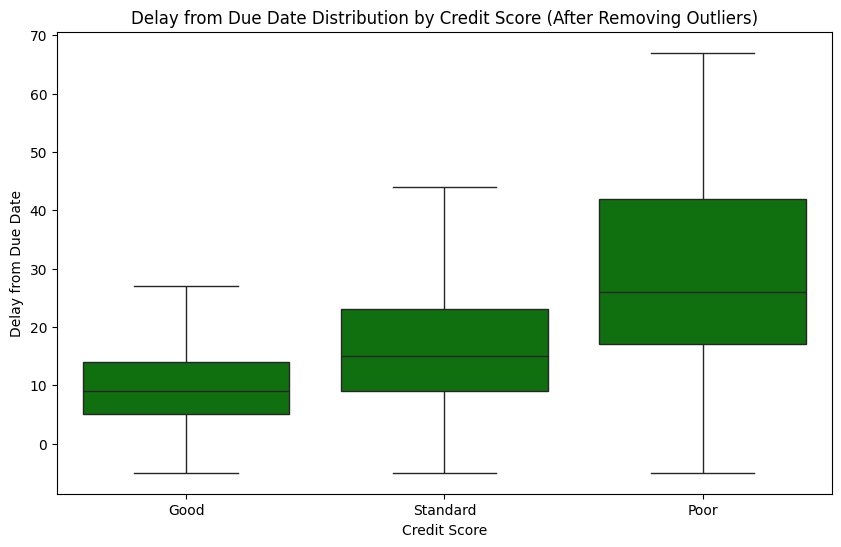

In [494]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv_filt3, x='Credit_Score', y='Delay_from_due_date', color ='g')

plt.title('Delay from Due Date Distribution by Credit Score (After Removing Outliers)')
plt.xlabel('Credit Score')
plt.ylabel('Delay from Due Date')
plt.show()

##### a.5.Frequency of Payment of Minimum Amount by Credit Score

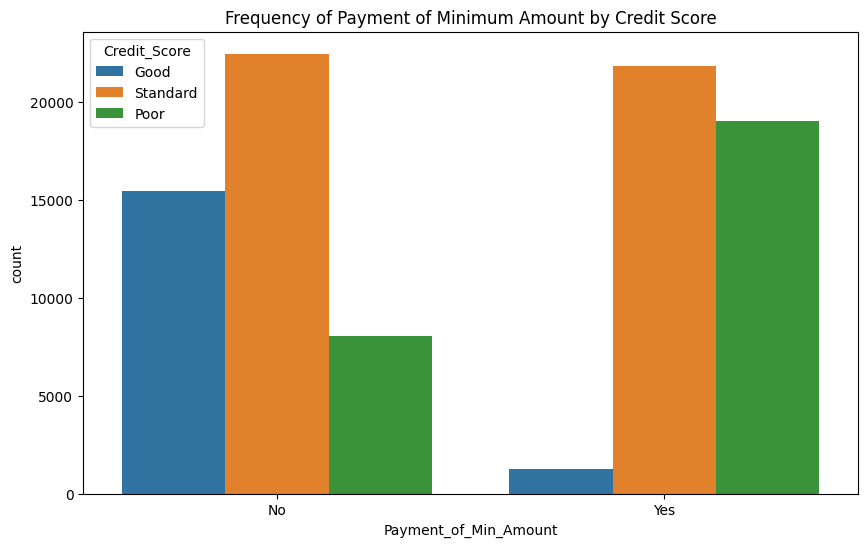

In [495]:
# Visualization with the third filtered dataframe
plt.figure(figsize=(10, 6))
sns.countplot(data=dfv_filt3, x='Payment_of_Min_Amount', hue='Credit_Score')
plt.title('Frequency of Payment of Minimum Amount by Credit Score')
plt.show()

##### a.6.Number of Credit Cards Distribution by Credit Score

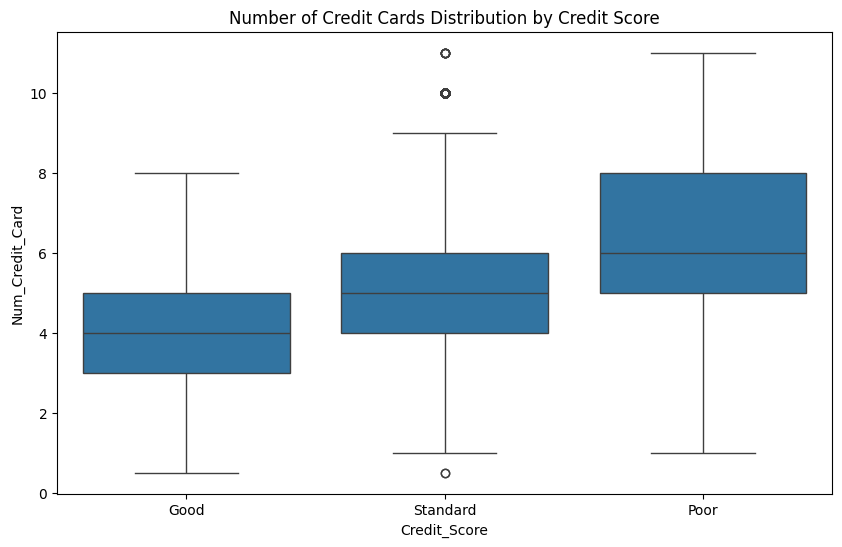

In [496]:
# boxplot with the third filtered dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv_filt3, x='Credit_Score', y='Num_Credit_Card')
plt.title('Number of Credit Cards Distribution by Credit Score')
plt.show()

In [534]:
# Remove outliers
dfv_filt4 = dfv_filt3[
    (dfv_filt3['Credit_Score'] == 'Good') |
    ((dfv_filt3['Credit_Score'] == 'Standard') & (dfv_filt3['Num_Credit_Card'] <= 9) & (dfv_filt3['Num_Credit_Card'] >= 1)) |
    (dfv_filt3['Credit_Score'] == 'Poor')
]

# Show the fourth filtered dataframe
dfv_filt4

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4.0,3.0,3,11.27,809.98,Good,No,Good
1,4.0,3.0,-1,11.27,809.98,Good,No,Good
2,4.0,3.0,3,0.00,809.98,Good,No,Good
3,4.0,3.0,5,6.27,809.98,Good,No,Good
4,4.0,3.0,6,11.27,809.98,Good,No,Good
...,...,...,...,...,...,...,...,...
99995,6.0,7.0,23,11.50,502.38,Good,No,Poor
99996,6.0,7.0,18,11.50,502.38,Good,No,Poor
99997,6.0,7.0,27,11.50,502.38,Good,No,Poor
99998,6.0,7.0,20,11.50,502.38,Good,No,Standard


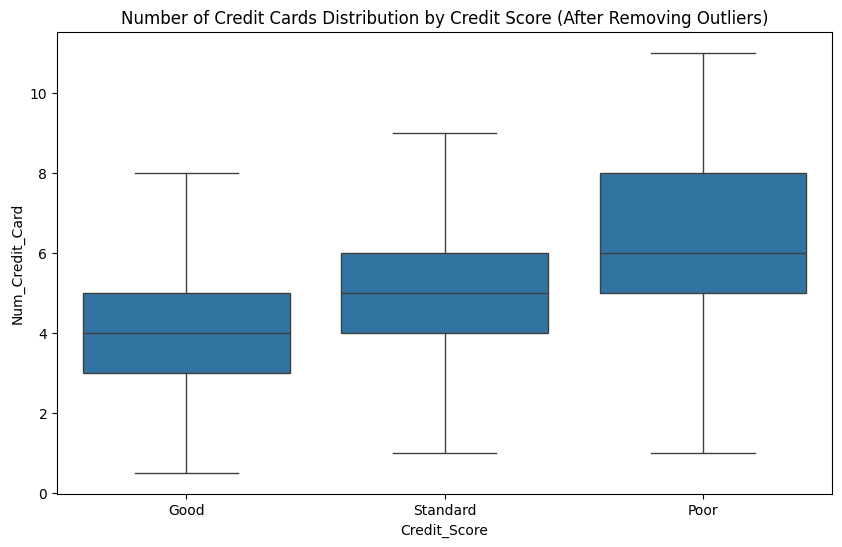

In [535]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=dfv_filt4, x='Credit_Score', y='Num_Credit_Card')
plt.title('Number of Credit Cards Distribution by Credit Score (After Removing Outliers)')
plt.show()

#### b.Pair Plot of Key Variables by Credit Score

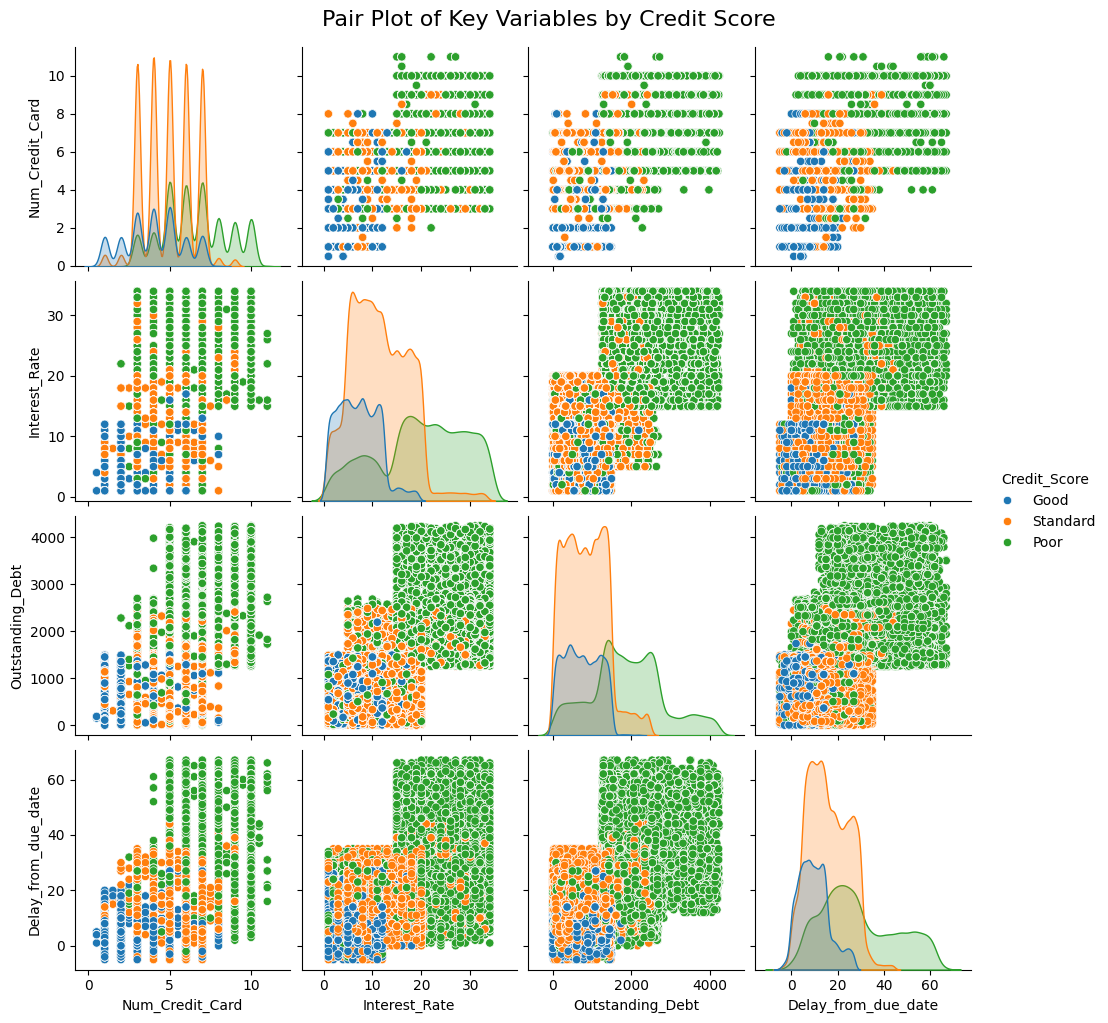

In [536]:
sns.pairplot(dfv_filt4, hue='Credit_Score', vars=['Num_Credit_Card','Interest_Rate', 'Outstanding_Debt', 'Delay_from_due_date'])
plt.suptitle('Pair Plot of Key Variables by Credit Score', y=1.02, fontsize=16)
plt.show()

## **8-Training and evaluation of prediction models**

In [537]:
dfv_filt4

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4.0,3.0,3,11.27,809.98,Good,No,Good
1,4.0,3.0,-1,11.27,809.98,Good,No,Good
2,4.0,3.0,3,0.00,809.98,Good,No,Good
3,4.0,3.0,5,6.27,809.98,Good,No,Good
4,4.0,3.0,6,11.27,809.98,Good,No,Good
...,...,...,...,...,...,...,...,...
99995,6.0,7.0,23,11.50,502.38,Good,No,Poor
99996,6.0,7.0,18,11.50,502.38,Good,No,Poor
99997,6.0,7.0,27,11.50,502.38,Good,No,Poor
99998,6.0,7.0,20,11.50,502.38,Good,No,Standard


In [538]:
dfv_filt4.shape

(87699, 8)

#### a.Encoding of categorical variables after removing outliers

##### a.1.Ordinal Encoding for "Credit Mix"

In [539]:
dfv_filt4["Credit_Mix"].value_counts().sort_values()

Credit_Mix
Bad         13276
Good        30134
Standard    44289
Name: count, dtype: int64

In [540]:
order = {'Bad': 0, 'Standard': 1, 'Good': 2}
dfv_filt4["CredMix_encoded"] = dfv_filt4["Credit_Mix"].map(order)
dfv_filt4["CredMix_encoded"].value_counts().sort_values()

C:\Users\CHAFFA Michèle\AppData\Local\Temp\ipykernel_10808\1999109638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv_filt4["CredMix_encoded"] = dfv_filt4["Credit_Mix"].map(order)


CredMix_encoded
0    13276
2    30134
1    44289
Name: count, dtype: int64

##### a.2.Label Encoding for "Paiement of minimum amount"

In [541]:
dfv_filt4["Payment_of_Min_Amount"].value_counts().sort_values()

Payment_of_Min_Amount
Yes    41825
No     45874
Name: count, dtype: int64

In [542]:
payment = LabelEncoder()
dfv_filt4['Payment_encoded'] = payment.fit_transform(dfv_filt4["Payment_of_Min_Amount"])
dfv_filt4['Payment_encoded'].value_counts().sort_values()

C:\Users\CHAFFA Michèle\AppData\Local\Temp\ipykernel_10808\7592382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv_filt4['Payment_encoded'] = payment.fit_transform(dfv_filt4["Payment_of_Min_Amount"])


Payment_encoded
1    41825
0    45874
Name: count, dtype: int64

##### a.3.Ordinal Encoding for "Credit score"

In [543]:
dfv_filt4["Credit_Score"].value_counts().sort_values()

Credit_Score
Good        16715
Poor        27046
Standard    43938
Name: count, dtype: int64

In [544]:
scoring = {'Poor': 0, 'Standard': 1, 'Good': 2}
dfv_filt4["Scoring_encoded"] = dfv_filt4["Credit_Score"].map(scoring)
dfv_filt4["Scoring_encoded"] .value_counts().sort_values()

C:\Users\CHAFFA Michèle\AppData\Local\Temp\ipykernel_10808\1651390849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv_filt4["Scoring_encoded"] = dfv_filt4["Credit_Score"].map(scoring)


Scoring_encoded
2    16715
0    27046
1    43938
Name: count, dtype: int64

#### b.Define features and target variable

In [545]:
df3 = dfv_filt4[[
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'CredMix_encoded',
 'Payment_encoded',
 'Scoring_encoded']]
df3.head()

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded,Scoring_encoded
0,4.0,3.0,3,11.27,809.98,2,0,2
1,4.0,3.0,-1,11.27,809.98,2,0,2
2,4.0,3.0,3,0.00,809.98,2,0,2
3,4.0,3.0,5,6.27,809.98,2,0,2
4,4.0,3.0,6,11.27,809.98,2,0,2


In [546]:
y = df3['Scoring_encoded']
X = df3.drop('Scoring_encoded', axis=1)
X,y

(       Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
 0                  4.0            3.0                    3   
 1                  4.0            3.0                   -1   
 2                  4.0            3.0                    3   
 3                  4.0            3.0                    5   
 4                  4.0            3.0                    6   
 ...                ...            ...                  ...   
 99995              6.0            7.0                   23   
 99996              6.0            7.0                   18   
 99997              6.0            7.0                   27   
 99998              6.0            7.0                   20   
 99999              6.0            7.0                   18   
 
        Changed_Credit_Limit  Outstanding_Debt CredMix_encoded  Payment_encoded  
 0                     11.27            809.98               2                0  
 1                     11.27            809.98               2                

##### b.1.Standardization of numeric features

In [547]:
numeric_columns = ['Num_Credit_Card', 'Interest_Rate' , 'Delay_from_due_date' , 'Changed_Credit_Limit' , 'Outstanding_Debt']

In [548]:
X[numeric_columns]

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt
0,4.0,3.0,3,11.27,809.98
1,4.0,3.0,-1,11.27,809.98
2,4.0,3.0,3,0.00,809.98
3,4.0,3.0,5,6.27,809.98
4,4.0,3.0,6,11.27,809.98
...,...,...,...,...,...
99995,6.0,7.0,23,11.50,502.38
99996,6.0,7.0,18,11.50,502.38
99997,6.0,7.0,27,11.50,502.38
99998,6.0,7.0,20,11.50,502.38


In [549]:
# Categorical features, already encoded
categorical_columns = ['CredMix_encoded', 'Payment_encoded']

In [550]:
X[categorical_columns]

,CredMix_encoded,Payment_encoded
0,2,0
1,2,0
2,2,0
3,2,0
4,2,0
...,...,...
99995,2,0
99996,2,0
99997,2,0
99998,2,0


In [551]:
# Create an instance of StandardScaler
scaler = StandardScaler()

In [552]:
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
X[numeric_columns]

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt
0,-0.650728,-1.248242,-1.176402,0.348708,-0.403713
1,-0.650728,-1.248242,-1.474427,0.348708,-0.403713
2,-0.650728,-1.248242,-1.176402,-1.537982,-0.403713
3,-0.650728,-1.248242,-1.027390,-0.488333,-0.403713
4,-0.650728,-1.248242,-0.952884,0.348708,-0.403713
...,...,...,...,...,...
99995,0.368939,-0.761416,0.313719,0.387211,-0.770020
99996,0.368939,-0.761416,-0.058811,0.387211,-0.770020
99997,0.368939,-0.761416,0.611743,0.387211,-0.770020
99998,0.368939,-0.761416,0.090201,0.387211,-0.770020


In [553]:
# Concateination of all columns
X_final = pd.concat([X[numeric_columns], X[categorical_columns]], axis=1)
X_final

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
0,-0.650728,-1.248242,-1.176402,0.348708,-0.403713,2,0
1,-0.650728,-1.248242,-1.474427,0.348708,-0.403713,2,0
2,-0.650728,-1.248242,-1.176402,-1.537982,-0.403713,2,0
3,-0.650728,-1.248242,-1.027390,-0.488333,-0.403713,2,0
4,-0.650728,-1.248242,-0.952884,0.348708,-0.403713,2,0
...,...,...,...,...,...,...,...
99995,0.368939,-0.761416,0.313719,0.387211,-0.770020,2,0
99996,0.368939,-0.761416,-0.058811,0.387211,-0.770020,2,0
99997,0.368939,-0.761416,0.611743,0.387211,-0.770020,2,0
99998,0.368939,-0.761416,0.090201,0.387211,-0.770020,2,0


##### b.2.Split data into training and test sets

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [555]:
X_train.shape , y_train.shape

((70159, 7), (70159,))

In [556]:
X_train

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
57935,0.368939,0.577356,2.772420,1.445231,0.681168,1,1
52762,-0.650728,-0.396296,-0.952884,-0.289117,-0.547973,2,0
16959,-1.670396,-0.152883,-0.431342,-0.814779,-0.246937,2,0
51030,0.368939,-0.883122,-0.207823,-1.313655,-1.189749,1,0
33723,0.878772,0.820769,3.070444,-1.266781,1.423594,0,1
...,...,...,...,...,...,...,...
7128,2.408273,1.185889,-0.729366,1.662862,1.504775,1,0
62632,-0.650728,-0.518003,-0.431342,0.015565,-0.805948,2,0
87694,-1.160562,0.090530,0.537237,-1.320352,0.360506,1,1
983,0.878772,-0.761416,0.313719,-0.071487,1.283002,1,1


In [557]:
X_test.shape , y_test.shape

((17540, 7), (17540,))

In [558]:
X_test

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
80375,-0.140895,0.942476,1.431310,-0.712660,1.402504,0,1
92153,-0.650728,-1.491655,-1.250908,0.002173,-1.127801,2,0
88386,-0.650728,-0.883122,-1.250908,-0.875046,-0.734914,2,0
74752,-0.650728,-1.004829,-0.505848,1.025037,-0.975050,1,1
22305,-2.180229,-0.761416,-0.356836,0.241566,-0.094496,2,0
...,...,...,...,...,...,...,...
41531,0.368939,-0.396296,0.760756,0.182974,-0.975633,2,0
728,-2.180229,-1.126535,-0.356836,-0.655741,-0.935394,2,0
79058,-1.160562,-0.396296,-0.580354,-1.042454,0.307073,2,0
1621,0.878772,1.551009,1.058780,-1.432515,2.154291,0,1


#### c.Logistic regression & evaluation

##### c.1. Logistic regression

In [559]:
# Training of model on the train set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [560]:
# Prediction on test set
y_pred = classifier.predict(X_test)
print(y_pred[0:20])

[0 2 2 1 2 1 1 1 0 0 1 0 1 0 0 2 1 1 1 1]


##### b.2.Performance evaluation of the Logistic Regression model

In [561]:
# Accuracy
accuracy_log_reg = round(accuracy_score(y_test, y_pred),4)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

Logistic Regression Accuracy: 0.7325


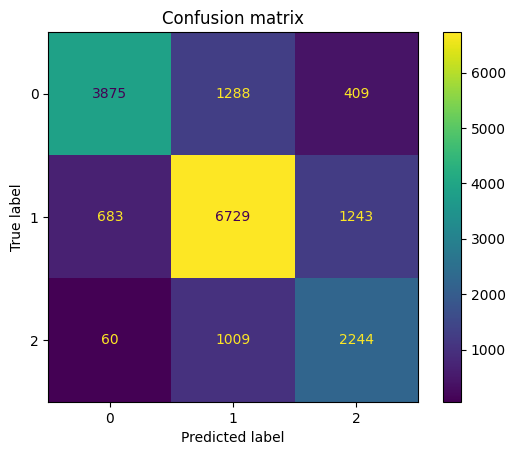

'Poor': 0, 'Standard': 1, 'Good': 2


In [562]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm_display.ax_.set_title("Confusion matrix") # Simply to set a title
plt.show() # Show graph
print("'Poor': 0, 'Standard': 1, 'Good': 2")

In [563]:
# Précision, Rappel, Score F1
precision_log_reg = precision_score(y_test, y_pred, average=None)
recall_log_reg = recall_score(y_test, y_pred, average=None)
f1_log_reg = f1_score(y_test, y_pred, average=None)

print(f'Logistic Regression Precision: {precision_log_reg}')
print(f'Logistic Regression Recall: {recall_log_reg}')
print(f'Logistic Regression F1 Score: {f1_log_reg}')

Logistic Regression Precision: [0.83910784 0.74551296 0.57597536]
Logistic Regression Recall: [0.69544149 0.77746967 0.67733172]
Logistic Regression F1 Score: [0.76054956 0.76115604 0.62255514]


#### d.Build Random Forest et evaluation

##### d.1. Random Forest

In [564]:
# Training the model
RFclassifier = RandomForestClassifier(n_estimators = 100)
RFclassifier.fit(X_train, y_train)


RandomForestClassifier()

In [565]:
# Make a Prediction
y_RFpred = RFclassifier.predict(X_test)
print(y_RFpred)

[0 1 2 ... 1 0 0]


##### d.2.Performance evaluation of the Random Forest model

In [566]:
# Calculate Accuracy
accuracy_RF = round(accuracy_score(y_test, y_RFpred),4)
print(f'Random Forest Accuracy: {accuracy_RF}')

Random Forest Accuracy: 0.8124


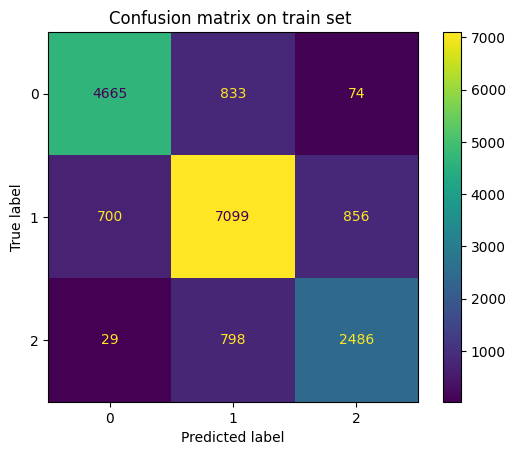

'Poor': 0, 'Standard': 1, 'Good': 2


In [567]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_RFpred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_RFpred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("'Poor': 0, 'Standard': 1, 'Good': 2")

In [568]:
# Calculate Précision, Rappel, Score F1
precision_rf = precision_score(y_test, y_RFpred,average=None)
recall_rf = recall_score(y_test, y_RFpred,average=None)
f1_rf = f1_score(y_test, y_RFpred,average=None)

print(f'Random Forest Precision: {precision_rf}')
print(f'Random Forest Recall: {recall_rf}')
print(f'Random Forest F1 Score: {f1_rf}')

Random Forest Precision: [0.86484983 0.81317297 0.72775176]
Random Forest Recall: [0.83722182 0.82021953 0.7503773 ]
Random Forest F1 Score: [0.8508116  0.81668105 0.73889137]


#### e.XG Boost Classifier & evaluation

##### e.1.XG Boost Classifier

In [569]:
# Create an XGBoost Classifier object
xgb_clf = XGBClassifier()

In [570]:
# Train the model
xgb_clf.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:CredMix_encoded: category

In [ ]:
# Make predictions
y_xgbpred = xgb_clf.predict(X_test)
y_xgbpred

array([1, 1, 1, ..., 2, 1, 0], dtype=int64)

##### e.2.Performance evaluation of the XGBoost model

In [ ]:
# Calculate model accuracy
accuracy_xgb = accuracy_score(y_test, y_xgbpred)
print(f'XGBoostClassifier accuracy: {accuracy_xgb :.4f}')

XGBoostClassifier accuracy: 0.7919


Confusion Matrix:
[[4344  800  290]
 [ 624 7046 1106]
 [  87  743 2501]]


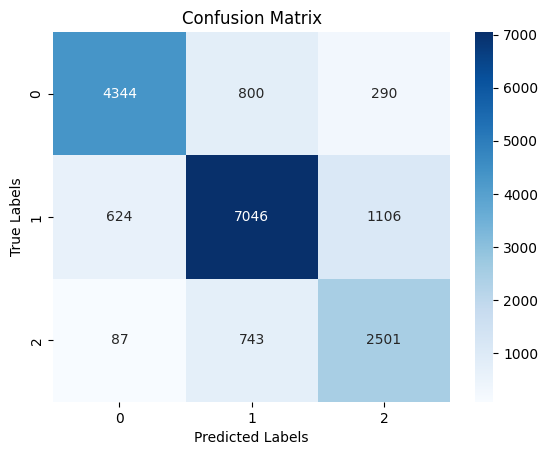

'Poor': 0, 'Standard': 1, 'Good': 2


In [ ]:
# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_xgbpred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_xgb)

# Visualize the confusion matrix using seaborn
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("'Poor': 0, 'Standard': 1, 'Good': 2")

In [ ]:
# Calculate Précision, Rappel, Score F1
precision_xgb = precision_score(y_test, y_xgbpred,average=None)
recall_xgb = recall_score(y_test, y_xgbpred,average=None)
f1_xgb = f1_score(y_test, y_xgbpred,average=None)

print(f'XGBoost Precision: {precision_xgb}')
print(f'XGBoost Recall: {recall_xgb}')
print(f'XGBoost F1 Score: {f1_xgb}')

XGBoost Precision: [0.85934718 0.82035161 0.64177572]
XGBoost Recall: [0.79941112 0.80287147 0.75082558]
XGBoost F1 Score: [0.82829631 0.81151742 0.69203099]


#### f.Support Vector Machines (SVM)

##### f.1.SVM model

In [ ]:
# Initialize the XGBoost classifier
svm_clf = svm.SVC(decision_function_shape='ovo')

In [ ]:
# Train the XGBoost classifier
svm_clf.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [ ]:
# Make predictions on the test set
y_svcpred = svm_clf.predict(X_test)
y_svcpred

array([1, 1, 1, ..., 2, 2, 0], dtype=int64)

##### f.2.Performance evaluation of the SVM model

In [ ]:
# Calculate accuracy
svm_accuracy = round(accuracy_score(y_test, y_svcpred),4)
print(f'Support Vector Machines accuracy: {svm_accuracy}')

Support Vector Machines accuracy: 0.7529


In [ ]:
# Let's take a look at the classification report
print(classification_report(y_test, y_svcpred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      5434
           1       0.81      0.76      0.78      8776
           2       0.54      0.77      0.64      3331

    accuracy                           0.75     17541
   macro avg       0.74      0.75      0.74     17541
weighted avg       0.78      0.75      0.76     17541



## **9-Prediction**

#### a.Saving ang loading model

    Save the model to disk

In [ ]:
dump(RFclassifier, 'random_forest_model.joblib')

['random_forest_model.joblib']

    Load the model from disk

In [ ]:
loaded_rf_model = load('random_forest_model.joblib')

#### b.Import and cleaning of second dataset for prediction

    Import 

In [ ]:
df4=pd.read_excel("../Credit_Score_Classification/Input/CreditScoreFor_prediction.xlsx")
df4.head(10)

,Customer_ID,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount
0,CUS_0x651d,4,11,7,13.63,1000.07,Standard,Yes
1,CUS_0x651d,4,11,4,13.63,1000.07,Standard,Yes
2,CUS_0x651d,4,11,7,13.63,1000.07,Standard,Yes
3,CUS_0x3e7f,6,11,25,6.65,1000.11,Good,No
4,CUS_0x3e7f,6,11,25,11.65,1000.11,Good,No
5,CUS_0x3e7f,6,11,25,11.65,1000.11,Good,No
6,CUS_0x3e7f,6,11,25,11.65,1000.11,Good,No
7,CUS_0x1ca9,4,7,22,7.32,1000.37,Good,No
8,CUS_0x1ca9,4,7,22,7.32,1000.37,Good,No
9,CUS_0x1ca9,4,7,22,7.32,1000.37,Good,No


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45937 entries, 0 to 45936
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            45937 non-null  object 
 1   Num_Credit_Card        45937 non-null  int64  
 2   Interest_Rate          45937 non-null  int64  
 3   Delay_from_due_date    45937 non-null  int64  
 4   Changed_Credit_Limit   45937 non-null  float64
 5   Outstanding_Debt       45937 non-null  float64
 6   Credit_Mix             45937 non-null  object 
 7   Payment_of_Min_Amount  45937 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.8+ MB


    Cleaning

In [ ]:
df4["Num_Credit_Card"].describe()

count    45937.000000
mean         5.541285
std          2.071676
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         20.000000
Name: Num_Credit_Card, dtype: float64

In [ ]:
df4["Interest_Rate"].describe()

count    45937.000000
mean        14.568931
std          8.730117
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         34.000000
Name: Interest_Rate, dtype: float64

In [ ]:
df4["Outstanding_Debt"] = df4["Outstanding_Debt"].astype(float)

    Ordinal encoding for Credit_Mix

In [ ]:
order1 = {'Bad': 0, 'Standard': 1, 'Good': 2}
df4["CredMix_encoded"] = df4["Credit_Mix"].map(order1)
df4["CredMix_encoded"].value_counts().sort_values()

CredMix_encoded
0    10937
2    13792
1    21208
Name: count, dtype: int64

    Label encoding for Payment of minimum account

In [ ]:
payment1 = LabelEncoder()
df4['Payment_encoded'] = payment1.fit_transform(df4["Payment_of_Min_Amount"])
df4['Payment_encoded'].value_counts().sort_values()

Payment_encoded
0    21688
1    24249
Name: count, dtype: int64

In [ ]:
df5 = df4.drop(['Customer_ID','CredMix_encoded', 'Payment_encoded'], axis =1)
df5

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount
0,4,11,7,13.63,1000.07,Standard,Yes
1,4,11,4,13.63,1000.07,Standard,Yes
2,4,11,7,13.63,1000.07,Standard,Yes
3,6,11,25,6.65,1000.11,Good,No
4,6,11,25,11.65,1000.11,Good,No
...,...,...,...,...,...,...,...
45932,6,19,7,6.94,999.36,Standard,Yes
45933,6,19,9,0.94,999.36,Standard,Yes
45934,5,9,6,3.15,999.48,Good,No
45935,5,9,6,3.15,999.48,Good,No


    Standardization

In [ ]:
X_validation = df4[['Num_Credit_Card',	'Interest_Rate',	'Delay_from_due_date',	'Changed_Credit_Limit',	'Outstanding_Debt', "CredMix_encoded", 'Payment_encoded']]
X_validation

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
0,4,11,7,13.63,1000.07,1,1
1,4,11,4,13.63,1000.07,1,1
2,4,11,7,13.63,1000.07,1,1
3,6,11,25,6.65,1000.11,2,0
4,6,11,25,11.65,1000.11,2,0
...,...,...,...,...,...,...,...
45932,6,19,7,6.94,999.36,1,1
45933,6,19,9,0.94,999.36,1,1
45934,5,9,6,3.15,999.48,2,0
45935,5,9,6,3.15,999.48,2,0


In [ ]:
numeric1_columns = ['Num_Credit_Card', 'Interest_Rate' , 'Delay_from_due_date' , 'Changed_Credit_Limit' , 'Outstanding_Debt']

In [ ]:
X_validation[numeric1_columns]

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt
0,4,11,7,13.63,1000.07
1,4,11,4,13.63,1000.07
2,4,11,7,13.63,1000.07
3,6,11,25,6.65,1000.11
4,6,11,25,11.65,1000.11
...,...,...,...,...,...
45932,6,19,7,6.94,999.36
45933,6,19,9,0.94,999.36
45934,5,9,6,3.15,999.48
45935,5,9,6,3.15,999.48


In [ ]:
scaler1 = StandardScaler()

In [ ]:
X_validation [numeric1_columns] = scaler.fit_transform(X_validation [numeric1_columns])
X_validation [numeric1_columns]

C:\Users\CHAFFA Michèle\AppData\Local\Temp\ipykernel_10808\2878082932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation [numeric1_columns] = scaler.fit_transform(X_validation [numeric1_columns])


,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt
0,-0.743988,-0.408811,-0.949330,0.457400,-0.375330
1,-0.743988,-0.408811,-1.151555,0.457400,-0.375330
2,-0.743988,-0.408811,-0.949330,0.457400,-0.375330
3,0.221425,-0.408811,0.264026,-0.595634,-0.375296
4,0.221425,-0.408811,0.264026,0.158688,-0.375296
...,...,...,...,...,...
45932,0.221425,0.507567,-0.949330,-0.551883,-0.375943
45933,0.221425,0.507567,-0.814512,-1.457070,-0.375943
45934,-0.261282,-0.637906,-1.016738,-1.123660,-0.375840
45935,-0.261282,-0.637906,-1.016738,-1.123660,-0.375840


In [ ]:
categorical1_columns = ['CredMix_encoded',	'Payment_encoded']
X_validation [categorical1_columns]

,CredMix_encoded,Payment_encoded
0,1,1
1,1,1
2,1,1
3,2,0
4,2,0
...,...,...
45932,1,1
45933,1,1
45934,2,0
45935,2,0


In [ ]:
Xval_final = pd.concat([X_validation [numeric1_columns], X_validation [categorical1_columns]], axis=1)
Xval_final

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,CredMix_encoded,Payment_encoded
0,-0.743988,-0.408811,-0.949330,0.457400,-0.375330,1,1
1,-0.743988,-0.408811,-1.151555,0.457400,-0.375330,1,1
2,-0.743988,-0.408811,-0.949330,0.457400,-0.375330,1,1
3,0.221425,-0.408811,0.264026,-0.595634,-0.375296,2,0
4,0.221425,-0.408811,0.264026,0.158688,-0.375296,2,0
...,...,...,...,...,...,...,...
45932,0.221425,0.507567,-0.949330,-0.551883,-0.375943,1,1
45933,0.221425,0.507567,-0.814512,-1.457070,-0.375943,1,1
45934,-0.261282,-0.637906,-1.016738,-1.123660,-0.375840,2,0
45935,-0.261282,-0.637906,-1.016738,-1.123660,-0.375840,2,0


#### c.Prediction on second dataset

In [ ]:
predictions = loaded_rf_model.predict(Xval_final)
predictions


array([1, 1, 1, ..., 2, 2, 1], dtype=int64)

In [ ]:
print(f'Poor: 0, Standard: 1, Good: 2')

Poor: 0, Standard: 1, Good: 2


In [ ]:
df5 ['Credit_Score'] = predictions
print(f'Poor: 0, Standard: 1, Good: 2')
df5.head(10)

Poor: 0, Standard: 1, Good: 2


,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score
0,4,11,7,13.63,1000.07,Standard,Yes,1
1,4,11,4,13.63,1000.07,Standard,Yes,1
2,4,11,7,13.63,1000.07,Standard,Yes,1
3,6,11,25,6.65,1000.11,Good,No,0
4,6,11,25,11.65,1000.11,Good,No,1
5,6,11,25,11.65,1000.11,Good,No,1
6,6,11,25,11.65,1000.11,Good,No,1
7,4,7,22,7.32,1000.37,Good,No,0
8,4,7,22,7.32,1000.37,Good,No,0
9,4,7,22,7.32,1000.37,Good,No,0


In [ ]:
df5['Credit_Score_label'] = df5['Credit_Score'].map(lambda x: 'Poor' if x == 0 else ('Standard' if x == 1 else 'Good'))
df5.head(50)

,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Mix,Payment_of_Min_Amount,Credit_Score,Credit_Score_label
0,4,11,7,13.63,1000.07,Standard,Yes,1,Standard
1,4,11,4,13.63,1000.07,Standard,Yes,1,Standard
2,4,11,7,13.63,1000.07,Standard,Yes,1,Standard
3,6,11,25,6.65,1000.11,Good,No,0,Poor
4,6,11,25,11.65,1000.11,Good,No,1,Standard
5,6,11,25,11.65,1000.11,Good,No,1,Standard
6,6,11,25,11.65,1000.11,Good,No,1,Standard
7,4,7,22,7.32,1000.37,Good,No,0,Poor
8,4,7,22,7.32,1000.37,Good,No,0,Poor
9,4,7,22,7.32,1000.37,Good,No,0,Poor


In [579]:
df5[['Credit_Score','Credit_Score_label']].value_counts().sort_index()

Credit_Score  Credit_Score_label
0             Poor                  15766
1             Standard              21842
2             Good                   8329
Name: count, dtype: int64